In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv("../../ML/data/housing.csv")
dataset.sample(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14962,-116.91,32.75,5.0,8710.0,1614.0,4372.0,1527.0,4.7813,240900.0,<1H OCEAN
17100,-122.26,37.45,17.0,2742.0,441.0,986.0,421.0,5.9285,496000.0,NEAR OCEAN
13981,-117.46,34.85,7.0,9759.0,1816.0,2933.0,1168.0,3.4912,157700.0,INLAND
14287,-117.12,32.73,50.0,2307.0,424.0,887.0,356.0,3.5156,168800.0,NEAR OCEAN
9015,-118.68,34.13,9.0,11251.0,1594.0,3029.0,1227.0,6.7273,500001.0,<1H OCEAN


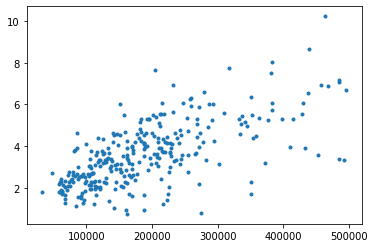

In [59]:
#dataset
dataset = dataset.loc[dataset['median_house_value'] < 500000]

dataset = dataset.sample(300)

x = dataset['median_house_value']
y = dataset['median_income']

plt.plot(x, y, '.')


In [61]:
def cost_function(x, y, weight, bias):
    #Mean squared error
    total_error = 0.0
    n = len(x)
    for i in range(n):
        total_error += (y[i] - ((weight*x[i]) + bias))**2
        
    return total_error/n
        